In [1]:
# day02파일에 적음..ㅠ

In [105]:
# 오차행렬을 보자!  -- 이진분류에서 성능 지표로 (정확도보다)잘 활용됨.

In [ ]:
## 혼동행렬 그림

![](conf_mat.png)

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test,pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [109]:
# 정밀도 = (맞춘 positive(1)) / (총 예측 positive(1))
# 재현율 = (맞춘 1) / (원래 1)  ????

# 어느 값이 특별히 높은 것보다 균형있게 높은 것이 좋다.
# 재현율(민감도, TPR**)이 중요한 지표의 경우 : 실제 positive양성 데이터를 Negative로 판단하게 되면 업무상 큰 영향이 발생하는 경우    
#                              ex) 암 판단 모델: 암인데 암아니라하면 오류의 대가가 더 큼. 암아닌데 암이라 하면 재검사하면 됨
# 정밀도가 더 중요한 지표인 경우 : 
#                              ex) 스펨메일 여부 판단 모델: 일반 메일을 잘못분류하면 못받게 된다..-> 영향이 큼

![](pre_re.png)

In [110]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,consensus_score

In [115]:
# 오차행렬의 정확도, 정밀도, 재현율 구해줌
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}')

In [116]:
titanic_df = pd.read_csv("titanic_train.csv")    # 데이터 가져오기
y_titanic_df = titanic_df['Survived']            # X,y 분리
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size=0.2,
                                                 random_state=0)

In [121]:
# from sklearn.linear_model import LogisticRegression
# import warnings
# warnings.filterwarnings('ignore')
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681


In [122]:
# 정밀도, 재현율의 트레이드오프 : 하나를 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.(두 값이 겹치는 부분이 있는데, 반드시 중앙에서 만나는 것은 아님)
#                              => 봐가면서 조절해 보자

In [124]:
pred_proba = lr_clf.predict_proba(X_test)    # 확률예측      # pred_proba 앞은 0일 확률, 뒤는 1일 확률 - 뒤만 보면 된다.
pred = lr_clf.predict(X_test)
pred_proba[:7],pred[:7]

(array([[0.85143272, 0.14856728],
        [0.89230123, 0.10769877],
        [0.93333601, 0.06666399],
        [0.05347494, 0.94652506],
        [0.3139637 , 0.6860363 ],
        [0.4899739 , 0.5100261 ],
        [0.08208226, 0.91791774]]),
 array([0, 0, 0, 1, 1, 1, 1], dtype=int64))

In [125]:
from sklearn.preprocessing import Binarizer

In [126]:
X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

In [128]:
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)
# threshold=0.0결과
# array([[1., 0., 1.],
#        [1., 0., 0.],
#        [0., 1., 1.]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [133]:
custom_threshold=0.6    # 0.5보다 정밀도 올라가고, 재현율 떨어짐
pred_proba_1 = pred_proba[:,1].reshape(-1,1)    # 행 전부, 두번째 열  //  reshape(-1,1) : 행은 데이터개수만큼 알아서, 열은 1개씩.이라는 뜻이래..
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)
# custom_threshold=0.4    # 0.5보다 재현율 올라가고, 정밀도 떨어짐
# 오차행렬
# [[86 24]
#  [13 56]]
# 정확도 : 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116

# custom_threshold=0.5 결과
# 오차행렬
# [[92 18]
#  [16 53]]
# 정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681

# 경계선에 있던 애들이 threshold때문에  0이 되기도 1이 되기도 하기 때문에 정밀도/재현율 변하는 것

오차행렬
[[99 11]
 [25 44]]
정확도 : 0.7989, 정밀도 : 0.8000, 재현율 : 0.6377


In [136]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('-'*20)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)    # 평가

In [137]:
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)    # 정밀도는 오르고 재현율은 떨어지는 것을 확인할 수 있다.

--------------------
임곗값: 0.4
오차행렬
[[86 24]
 [13 56]]
정확도 : 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116
--------------------
임곗값: 0.45
오차행렬
[[91 19]
 [14 55]]
정확도 : 0.8156, 정밀도 : 0.7432, 재현율 : 0.7971
--------------------
임곗값: 0.5
오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681
--------------------
임곗값: 0.55
오차행렬
[[97 13]
 [18 51]]
정확도 : 0.8268, 정밀도 : 0.7969, 재현율 : 0.7391
--------------------
임곗값: 0.6
오차행렬
[[99 11]
 [25 44]]
정확도 : 0.7989, 정밀도 : 0.8000, 재현율 : 0.6377


In [138]:
# 정밀도와 재현율의 변화
from sklearn.metrics import precision_recall_curve

In [139]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

In [142]:
precision_recall_curve(y_test,pred_proba_class1)    # 튜플 안에 array형태로 3개 들어가 있음(높아지는 거:정밀도, 낮아지는거:재현율, ?)

(array([0.39884393, 0.39534884, 0.39766082, 0.4       , 0.40236686,
        0.39880952, 0.4011976 , 0.40361446, 0.40606061, 0.40853659,
        0.41104294, 0.41358025, 0.41614907, 0.4125    , 0.41509434,
        0.41772152, 0.42038217, 0.42307692, 0.42580645, 0.42207792,
        0.4248366 , 0.42763158, 0.43046358, 0.43918919, 0.44827586,
        0.45138889, 0.45774648, 0.46099291, 0.46428571, 0.4676259 ,
        0.46376812, 0.46715328, 0.47058824, 0.47407407, 0.47761194,
        0.48120301, 0.48484848, 0.48854962, 0.49230769, 0.49612403,
        0.5       , 0.50393701, 0.50793651, 0.512     , 0.51612903,
        0.5203252 , 0.52459016, 0.52892562, 0.53781513, 0.54237288,
        0.53846154, 0.54310345, 0.55263158, 0.55752212, 0.5625    ,
        0.56756757, 0.57272727, 0.57798165, 0.58333333, 0.58878505,
        0.59433962, 0.6       , 0.60576923, 0.61165049, 0.61764706,
        0.61386139, 0.61      , 0.61616162, 0.62244898, 0.62886598,
        0.63541667, 0.64210526, 0.64893617, 0.64

In [143]:
precision,recall,thresholds = precision_recall_curve(y_test,pred_proba_class1)

In [144]:
precision.shape,recall.shape,thresholds.shape

((167,), (167,), (166,))

In [146]:
# 데이터 167개, thresholds는 166개 - 1개 차이나네
# 반환된 임계값 배열 로우가 167건이므로 샘플로 12건만 추출하되, 임곗값을 15step으로 추출
thr_index = np.arange(0,thresholds.shape[0],15)
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165])

In [148]:
print(np.round(precision[thr_index],3))
print(np.round(recall[thr_index],3))

[0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
[1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


In [149]:
import matplotlib.pyplot as plt
import matplotlib.ticker as kicker

In [154]:
def precision_recall_curve_plot(y_test,pred_proba):
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]    # 166
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))    # plt.xlim의 start부터 end까지 0.1간격으로 소수둘째자리 반올림
    plt.legend()
    plt.grid()
    plt.show()

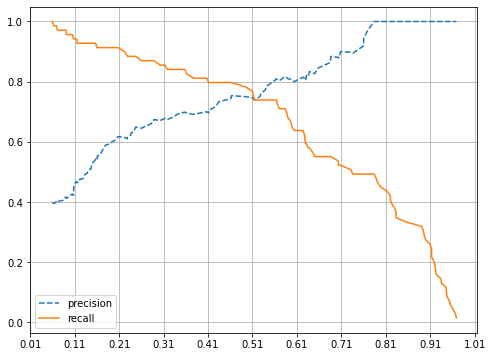

In [156]:
precision_recall_curve_plot(y_test,pred_proba_class1)    # 임곗값(정밀도와 재현율이 비슷)이 0.51지점인 것을 확인

In [157]:
#!!!! 정밀도와 재현율의 맹점
# 하나는 떨어지고 하나는 높아지기 때문에 하나만 높일 수가 없다. = balance를 이루는게 가장 좋다.
# => F1스코어(정밀도와 재현율을 결합한 지표) - 어느 한쪽으로 치우치지 않을 때 높은 값을 가진다.

In [158]:
from sklearn.metrics import f1_score

In [159]:
f1 = f1_score(y_test,pred)
f1

0.7571428571428571

In [160]:
# 오차행렬의 정확도, 정밀도, 재현율 구해줌
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}')

In [162]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('-'*20)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)    # 평가
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)
# F1은 0.45에서 가장 높게 나오네.

--------------------
임곗값: 0.4
오차행렬
[[86 24]
 [13 56]]
정확도 : 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116, F1 : 0.7517
--------------------
임곗값: 0.45
오차행렬
[[91 19]
 [14 55]]
정확도 : 0.8156, 정밀도 : 0.7432, 재현율 : 0.7971, F1 : 0.7692
--------------------
임곗값: 0.5
오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681, F1 : 0.7571
--------------------
임곗값: 0.55
오차행렬
[[97 13]
 [18 51]]
정확도 : 0.8268, 정밀도 : 0.7969, 재현율 : 0.7391, F1 : 0.7669
--------------------
임곗값: 0.6
오차행렬
[[99 11]
 [25 44]]
정확도 : 0.7989, 정밀도 : 0.8000, 재현율 : 0.6377, F1 : 0.7097


In [163]:
# AUC스코어 : 1에 가까울수록 좋은 것. 즉, ROC곡선이 가득 차게 그려지는 것이 좋다.
# ROC곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선 (FPR이 x축, TPR이 y축)
# TNR = TN / (FP + TN)
# FPR = FP / (FP + TN) = (1 - TNR) = (1 - 특이성)

In [164]:
from sklearn.metrics import roc_curve

In [166]:
fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)

In [167]:
thr_index = np.arange(1,thresholds.shape[0],5)    # 1에서 166까지 5마다.

In [168]:
fprs[thr_index]

array([0.        , 0.04545455, 0.09090909, 0.10909091, 0.22727273,
       0.26363636, 0.46363636, 0.51818182, 0.72727273, 0.85454545,
       1.        ])

In [169]:
tprs[thr_index]

array([0.01449275, 0.55072464, 0.5942029 , 0.73913043, 0.8115942 ,
       0.86956522, 0.91304348, 0.92753623, 0.94202899, 0.97101449,
       1.        ])

In [170]:
def roc_curve_plot(y_test,pred_proba):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)
    plt.plot(fprs,tprs,label='ROC')
    plt.show()

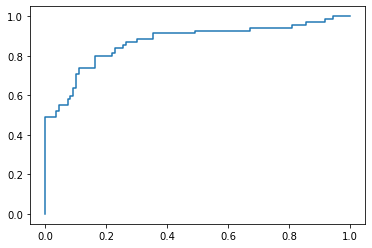

In [172]:
roc_curve_plot(y_test,pred_proba_class1)    # 아래쪽 면적이 AUC값 = 1에 가까울수록 좋다.!!

In [ ]:
## 피마 인디언 당뇨병 예측